# Lab 7

Please submit as a pdf. 

Submission deadline is mentioned in the blackboard submission system.

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Dataset


Datafile Name: Enrollment Forecast

Number of cases: 29
Variable Names:

* 1.YEAR: 1961 = 1, 1989 = 29
* 2.ROLL: Fall undergraduate enrollment
* 3.UNEM: January unemployment rate (%) for New Mexico
* 4.HGRAD: Spring high schoolgraduates in New Mexico
* 5.INC: Per capita income in Albuquerque (1961 dollars)

In [2]:
# Write your code here to generate the following output
df = pd.read_csv('enrollment_forecast.csv')
df.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
# Write your code here to generate the following output
df.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [4]:
# Write your code here to generate the following output
df.describe()

,year,roll,unem,hgrad,inc
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,12707.034483,7.717241,16528.137931,2729.482759
std,8.514693,3254.076987,1.123155,2926.926676,461.429194
min,1.000000,5501.000000,5.700000,9552.000000,1923.000000
25%,8.000000,10167.000000,7.000000,15723.000000,2351.000000
50%,15.000000,14395.000000,7.500000,17203.000000,2863.000000
75%,22.000000,14969.000000,8.200000,18266.000000,3127.000000
max,29.000000,16081.000000,10.100000,19800.000000,3345.000000


In [5]:
# Write your code here to generate the following output
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    29 non-null     int64  
 1   roll    29 non-null     int64  
 2   unem    29 non-null     float64
 3   hgrad   29 non-null     int64  
 4   inc     29 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.3 KB


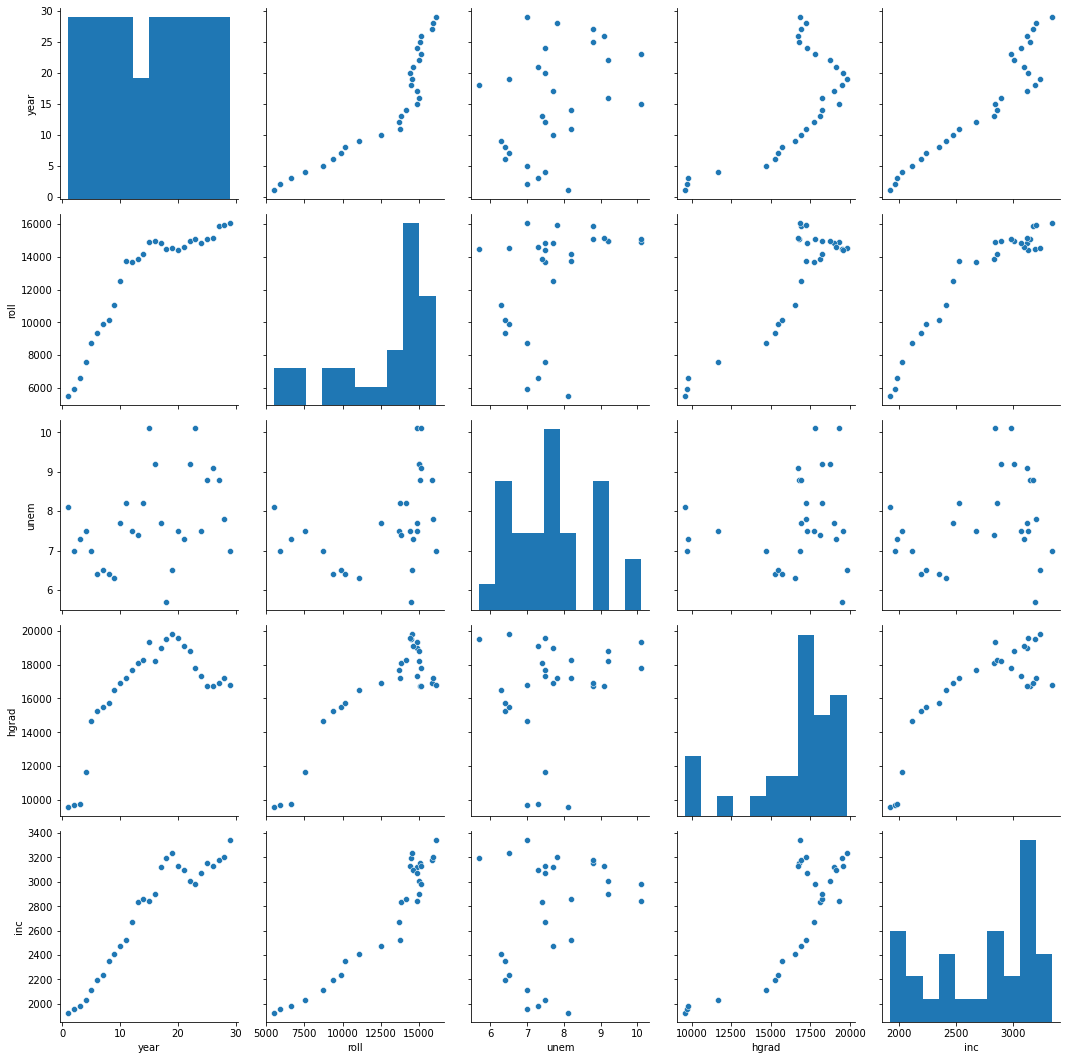

In [6]:
# Write your code here to generate the following output
sns.PairGrid(df, height=3, diag_sharey=False).map_diag(plt.hist).map_offdiag(sns.scatterplot)

# Modelling
## Data Prep
Use 'year', 'unem','hgrad', 'inc' as input variables and 'roll' as the output variables.

In [7]:
# Write your code here
X = df[['year', 'unem', 'hgrad', 'inc']]

y = df['roll']

###### ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=6**

In [8]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
print(X_train.shape, X_test.shape, X.shape)

(20, 4) (9, 4) (29, 4)


## Training the Model

Now its time to train our model on our training data!

Use a multi regression model or polynomial regression model (your choice).

Fit the model using the training data.


In [9]:
# Write your code here
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# pm = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
# pm.fit(X_train, y_train)

LinearRegression()

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test data!



[ 6434.34370283 15361.76348454 15453.24695402 10101.75170684
 15450.08561873 15347.53345452 10489.25437803  9768.89176196
 15801.96765012]


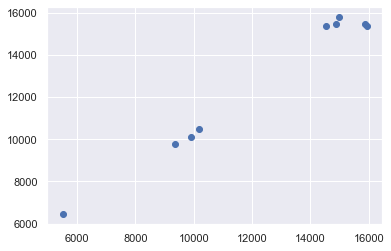

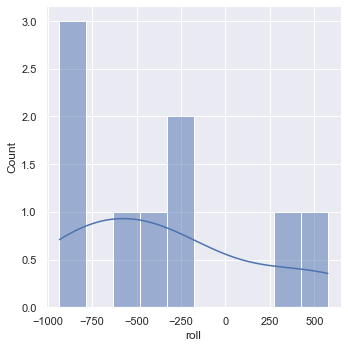

In [10]:
# Write your code here
sns.set()
predictions = lm.predict(X_test)
print(predictions)
plt.scatter(y_test, predictions)
sns.displot((y_test - predictions), bins=10, kde=True)
# predictions = pm.predict(X_test)
# plt.scatter(y_test, predictions)
# sns.displot((y_test - predictions), bins=10, kde=True)

## Evaluating the Model

Calculate the MAE, MSE, RMSE erros of the model on the test data.

In [11]:
# Write your code here
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 557.7575371626483
MSE: 369520.63219931483
RMSE: 607.8820874144219
